<a href="https://colab.research.google.com/github/didarpujangga/Data-Set-Penjualan-Bakery/blob/main/MBA_RFM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARY

In [ ]:
pip install apyori

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
import datetime as dt
import os

#LOAD DATA

In [ ]:
df = pd.read_excel('/content/Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
print(f"Jumlah baris sebelum: {len(df)}")
df.dropna(inplace=True)
print(f"Jumlah baris setelah: {len(df)}")

Jumlah baris sebelum: 541909
Jumlah baris setelah: 406829


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


#ALGORITMA APRIORI

In [ ]:
# Gabungkan informasi segmentasi ke data transaksi
df_merged = df.merge(
    df_grouped[['CustomerID', 'CustomerSegment']],
    on='CustomerID',
    how='left'
)

# Cek hasil gabungan
df_merged[['CustomerID', 'InvoiceNo', 'Description', 'CustomerSegment']].head()

,CustomerID,InvoiceNo,Description,CustomerSegment
0,17850.0,536365,WHITE HANGING HEART T-LIGHT HOLDER,At-Risk
1,17850.0,536365,WHITE METAL LANTERN,At-Risk
2,17850.0,536365,CREAM CUPID HEARTS COAT HANGER,At-Risk
3,17850.0,536365,KNITTED UNION FLAG HOT WATER BOTTLE,At-Risk
4,17850.0,536365,RED WOOLLY HOTTIE WHITE HEART.,At-Risk


In [ ]:
# Ambil semua kategori segmentasi pelanggan
segments = df_merged['CustomerSegment'].dropna().unique()
print("Daftar Segmen Pelanggan:", segments)

Daftar Segmen Pelanggan: ['At-Risk' 'Engaged/Loyal' 'Growth Potential' 'Low Value']


In [ ]:
# Pilih salah satu segmen
segment = 'Engaged/Loyal'

# Filter data berdasarkan segmen
df_seg = df_merged[df_merged['CustomerSegment'] == segment]

# Buat keranjang transaksi per InvoiceNo (list produk per transaksi)
keranjang = df_seg.groupby('InvoiceNo')['Description'].apply(list)
keranjang.head()


,Description
InvoiceNo,
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
536369,[BATH BUILDING BLOCK WORD]
536370,"[ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI..."
536376,"[HOT WATER BOTTLE TEA AND SYMPATHY, RED HANGIN..."


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Encoding ke format 0-1
te = TransactionEncoder()
te_ary = te.fit(keranjang).transform(keranjang)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

basket_df.head()

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori

# Jalankan algoritma apriori
frequentitemsets = apriori(basket_df, min_support=0.02, use_colnames=True)

# Cek hasil frequent itemsets
frequentitemsets.sort_values(by='support', ascending=False).head(10)


,support,itemsets
211,0.105853,(WHITE HANGING HEART T-LIGHT HOLDER)
93,0.099521,(JUMBO BAG RED RETROSPOT)
170,0.088238,(REGENCY CAKESTAND 3 TIER)
116,0.083935,(LUNCH BAG RED RETROSPOT)
13,0.072814,(ASSORTED COLOUR BIRD ORNAMENT)
138,0.071597,(PARTY BUNTING)
108,0.068593,(LUNCH BAG BLACK SKULL.)
153,0.061206,(POSTAGE)
182,0.060638,(SET OF 3 CAKE TINS PANTRY DESIGN )
117,0.060151,(LUNCH BAG SPACEBOY DESIGN )


In [ ]:
# Ambil pasangan item (itemsets dengan panjang 2)
top_pairs = frequentitemsets[frequentitemsets['itemsets'].apply(lambda x: len(x) == 2)]
top_pairs = top_pairs.sort_values(by='support', ascending=False)
top_pairs['Item 1'] = top_pairs['itemsets'].apply(lambda x: list(x)[0])
top_pairs['Item 2'] = top_pairs['itemsets'].apply(lambda x: list(x)[1])

top_pairs.head()


,support,itemsets,Item 1,Item 2
239,0.035798,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT
226,0.035636,"(ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...",ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN
250,0.034987,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",LUNCH BAG RED RETROSPOT,LUNCH BAG BLACK SKULL.
267,0.034175,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...",LUNCH BAG RED RETROSPOT,LUNCH BAG PINK POLKADOT
249,0.030765,"(LUNCH BAG BLACK SKULL., LUNCH BAG PINK POLKA...",LUNCH BAG BLACK SKULL.,LUNCH BAG PINK POLKADOT


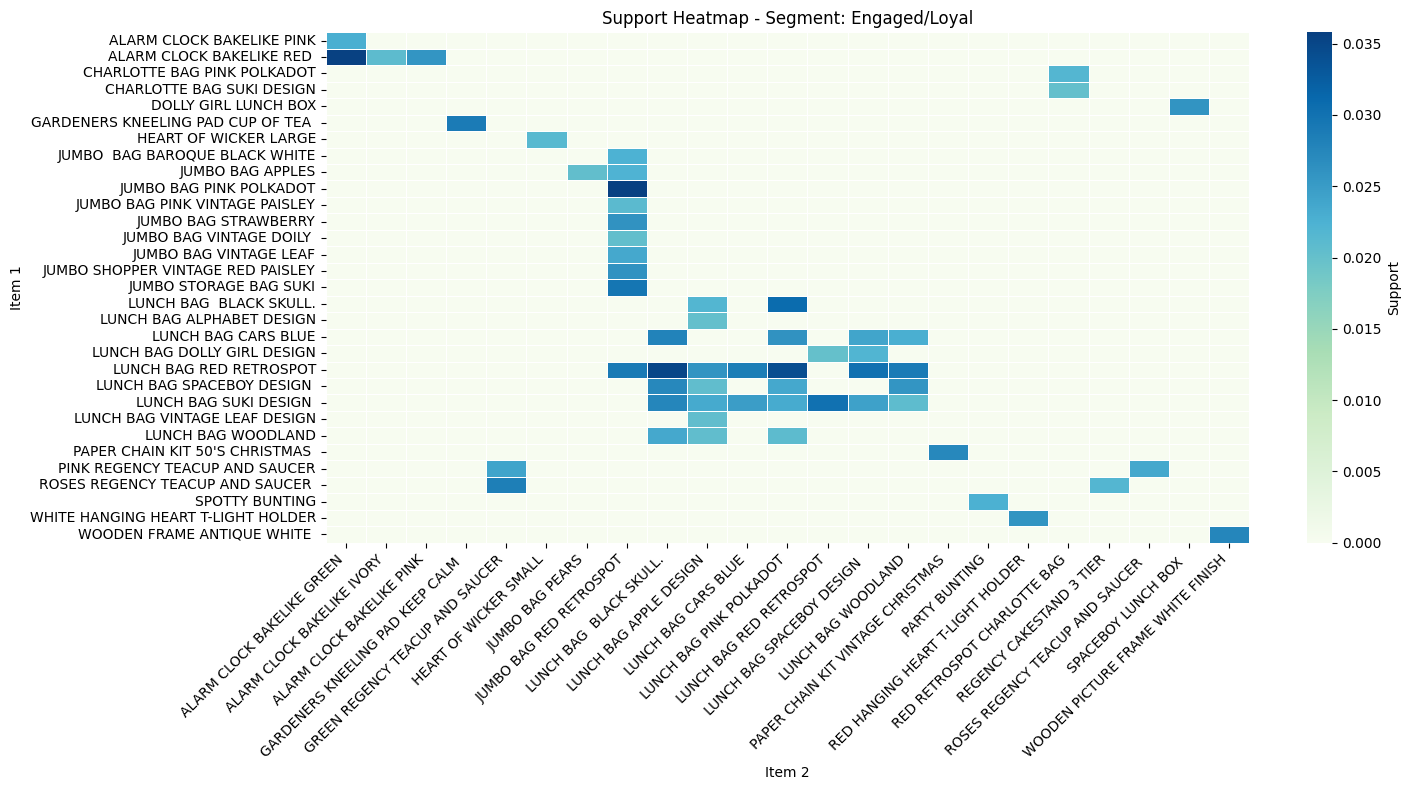

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat data heatmap
heatmap_data = pd.crosstab(top_pairs['Item 1'], top_pairs['Item 2'],
                           values=top_pairs['support'],
                           aggfunc='mean').fillna(0)

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=False, cmap='GnBu', fmt=".2f",
            cbar_kws={'label': 'Support'}, linewidths=0.5)
plt.title(f'Support Heatmap - Segment: {segment}')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Item 2')
plt.ylabel('Item 1')
plt.tight_layout()
plt.show()

<ipython-input-24-64835db19c38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_pairs['pair'] = top_10_pairs['Item 1'] + ' & ' + top_10_pairs['Item 2']


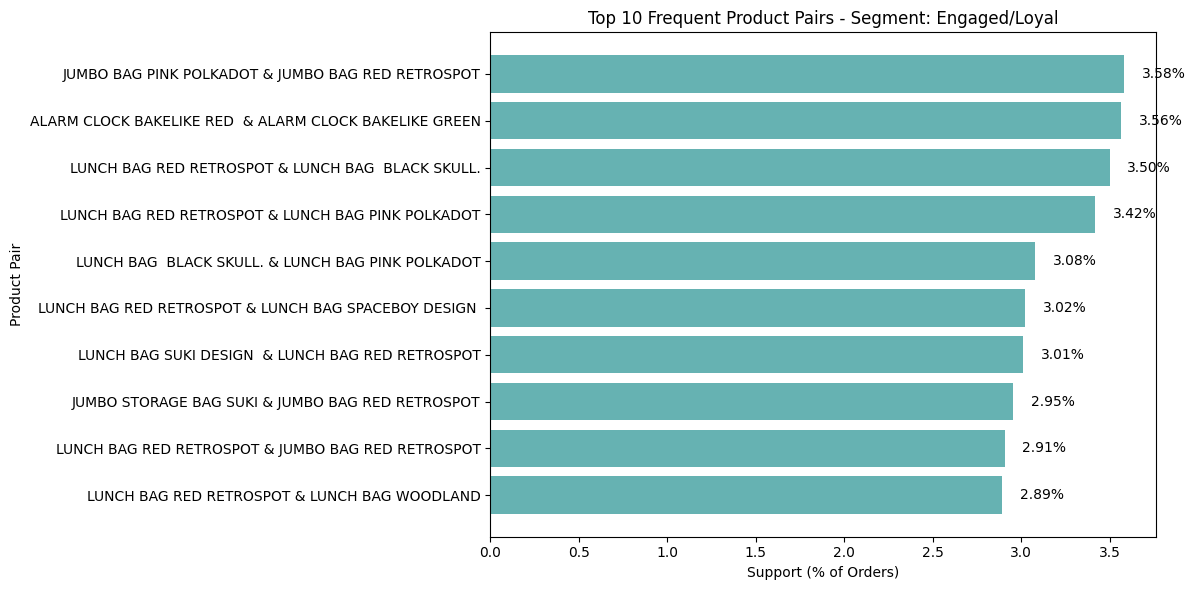

In [ ]:
# Top 10 pairs
top_10_pairs = top_pairs.head(10)

# Gabungkan nama pasangan
top_10_pairs['pair'] = top_10_pairs['Item 1'] + ' & ' + top_10_pairs['Item 2']
support_values = top_10_pairs['support'] * 100

# Plot bar chart
plt.figure(figsize=(12,6))
bars = plt.barh(top_10_pairs['pair'], support_values, color='#66b2b2')
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}%', va='center', ha='left', fontsize=10)
plt.xlabel("Support (% of Orders)")
plt.ylabel("Product Pair")
plt.title(f"Top 10 Frequent Product Pairs - Segment: {segment}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Buat association rules dari frequent itemsets
rules = association_rules(frequentitemsets, metric='lift', min_threshold=1.0)

# Pilih kolom penting
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Sort berdasarkan lift tertinggi
rules = rules.sort_values(by='lift', ascending=False).reset_index(drop=True)

rules.head()

,antecedents,consequents,support,confidence,lift
0,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.020700,0.583524,24.787698
1,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.020700,0.879310,24.787698
2,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.020700,0.728571,24.389325
3,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.020700,0.692935,24.389325
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.024109,0.679634,22.751113


In [ ]:
# Buat kolom label rule
rules['rule'] = rules['antecedents'].apply(lambda x: ', '.join(sorted(x))) + \
                ' --> ' + rules['consequents'].apply(lambda x: ', '.join(sorted(x)))
rules = rules[['rule', 'support', 'confidence', 'lift']]
rules.head(10)

,rule,support,confidence,lift
0,GREEN REGENCY TEACUP AND SAUCER --> PINK REGEN...,0.020700,0.583524,24.787698
1,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ...",0.020700,0.879310,24.787698
2,"GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.020700,0.728571,24.389325
3,PINK REGENCY TEACUP AND SAUCER --> GREEN REGEN...,0.020700,0.692935,24.389325
4,GREEN REGENCY TEACUP AND SAUCER --> PINK REGEN...,0.024109,0.679634,22.751113
5,PINK REGENCY TEACUP AND SAUCER --> GREEN REGEN...,0.024109,0.807065,22.751113
6,"GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY ...",0.020700,0.858586,20.418763
7,ROSES REGENCY TEACUP AND SAUCER --> GREEN REG...,0.020700,0.492278,20.418763
8,GREEN REGENCY TEACUP AND SAUCER --> ROSES REGE...,0.028411,0.800915,19.047251
9,ROSES REGENCY TEACUP AND SAUCER --> GREEN REG...,0.028411,0.675676,19.047251


In [ ]:
filtered_rules = rules[(rules['confidence'] > 0.8) & (rules['lift'] > 1)]
top10_rules = filtered_rules.sort_values(by='lift', ascending=False).head(10)
top10_rules

,rule,support,confidence,lift
1,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ...",0.020700,0.879310,24.787698
5,PINK REGENCY TEACUP AND SAUCER --> GREEN REGEN...,0.024109,0.807065,22.751113
6,"GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY ...",0.020700,0.858586,20.418763
8,GREEN REGENCY TEACUP AND SAUCER --> ROSES REGE...,0.028411,0.800915,19.047251


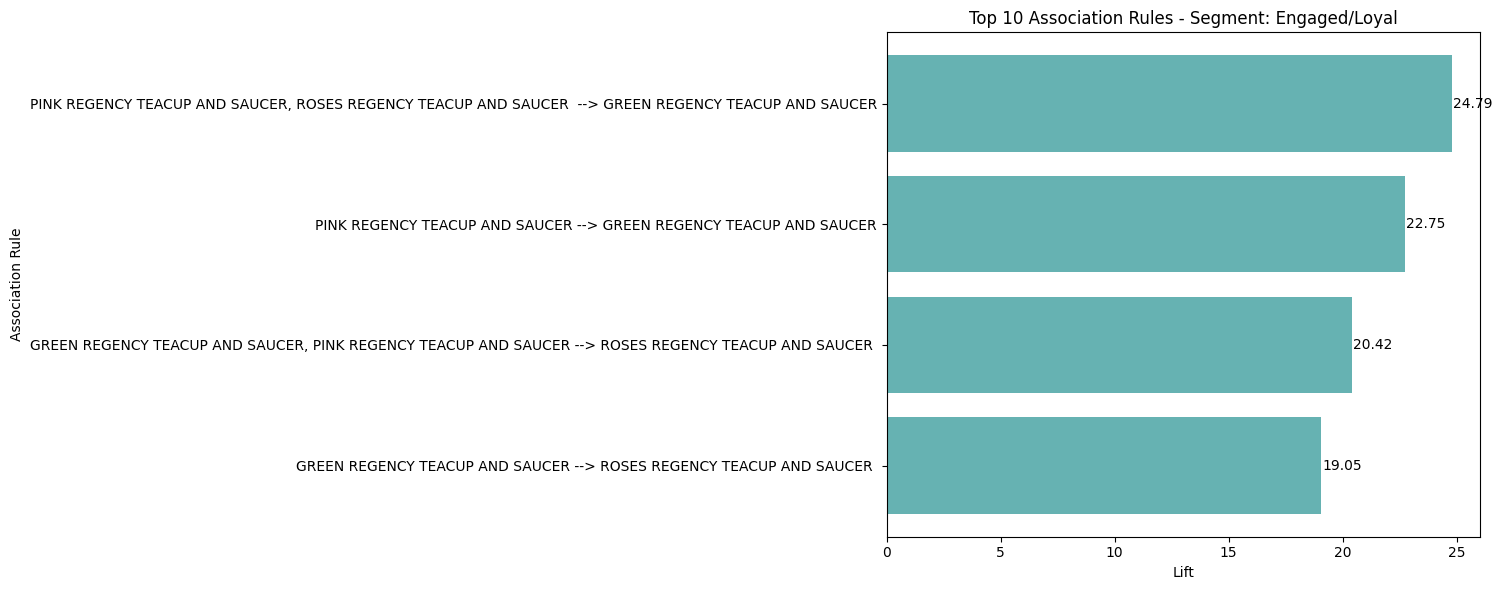

In [ ]:
# Plot bar chart lift dari top 10 rules
rule_labels = top10_rules['rule']
lift_values = top10_rules['lift']

plt.figure(figsize=(15, 6))
bars = plt.barh(rule_labels, lift_values, color='#66b2b2')
for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)
plt.xlabel("Lift")
plt.ylabel("Association Rule")
plt.title(f"Top 10 Association Rules - Segment: {segment}")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()